In [ ]:
# Лабораторная работа 1
# 3374
# Лобачев Иван Максимович
# Исследование набора данных

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 8)
sns.set_style("whitegrid")

In [5]:
# Загрузка датасета по URL
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
df = pd.read_csv(url, sep=';')
print(f"Размер датасета: {df.shape}")
print(f"Колонки: {list(df.columns)}")

Размер датасета: (1599, 12)
Колонки: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']


In [6]:
# Описание датасета
print("Red Wine Quality (UCI) - Классификация качества вина по хим. параметрам")
print(f"Признаки: {len(df.columns)-1} числовых, Целевая: quality ({df['quality'].min()}-{df['quality'].max()})")

Red Wine Quality (UCI) - Классификация качества вина по хим. параметрам
Признаки: 11 числовых, Целевая: quality (3-8)


In [ ]:
# Просмотр первых строк
print("Первые строки данных:")
display(df.head())
# Базовая информация о данных
print("Информация о данных:")
df.info()
print("Базовая статистика:")
display(df.describe())

Первые 5 строк данных:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
Базовая статистика:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
# Анализ пропущенных значений
missing_data = df.isnull().sum()
print("Пропущенные значения:")
print(missing_data)
print(f"Всего: {missing_data.sum()}")
if missing_data.sum() == 0:
    print("Пропусков нет")
else:
    for col, count in missing_data[missing_data > 0].items():
        print(f"{col}: {count} ({(count/len(df))*100:.1f}%)")

Пропущенные значения:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64
Всего: 0
Пропусков нет


In [ ]:
# Статистики атрибутов
stats_df = pd.DataFrame({
    'Среднее': df.mean(),
    'Стандартное отклонение': df.std(),
    'Медиана': df.median(),
    'Минимум': df.min(),
    'Максимум': df.max()
})
display(stats_df.round(3))

,Среднее,Стандартное отклонение,Медиана,Минимум,Максимум
fixed acidity,8.320,1.741,7.900,4.600,15.900
volatile acidity,0.528,0.179,0.520,0.120,1.580
citric acid,0.271,0.195,0.260,0.000,1.000
residual sugar,2.539,1.410,2.200,0.900,15.500
chlorides,0.087,0.047,0.079,0.012,0.611
free sulfur dioxide,15.875,10.460,14.000,1.000,72.000
total sulfur dioxide,46.468,32.895,38.000,6.000,289.000
density,0.997,0.002,0.997,0.990,1.004
pH,3.311,0.154,3.310,2.740,4.010
sulphates,0.658,0.170,0.620,0.330,2.000


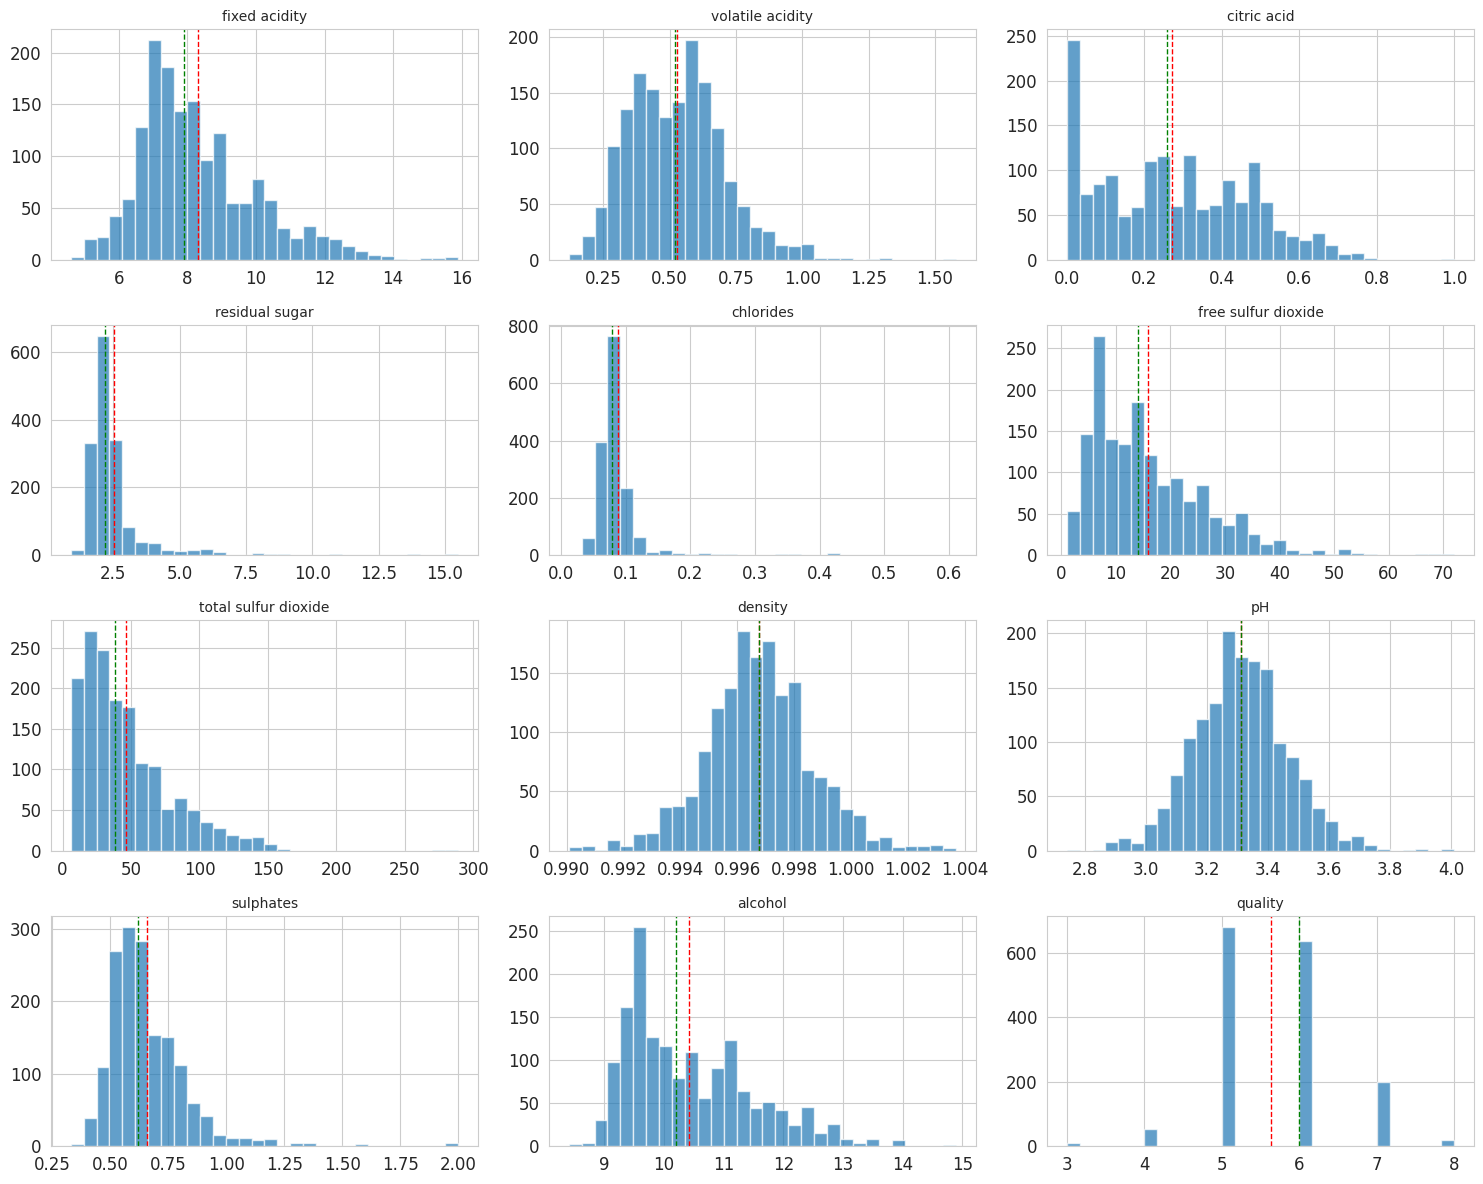

Анализ: нормальные распределения, правосторонняя асимметрия в residual sugar, free sulfur dioxide


In [ ]:
# Гистограммы распределения
fig, axes = plt.subplots(4, 3, figsize=(15, 12))
axes = axes.ravel()
for i, column in enumerate(df.columns):
    df[column].hist(bins=30, ax=axes[i], alpha=0.7)
    axes[i].set_title(column, fontsize=10)
    axes[i].axvline(df[column].mean(), color='red', linestyle='--', linewidth=1)
    axes[i].axvline(df[column].median(), color='green', linestyle='--', linewidth=1)
plt.tight_layout()
plt.show()
print("Анализ: нормальные распределения, правосторонняя асимметрия в residual sugar, free sulfur dioxide")

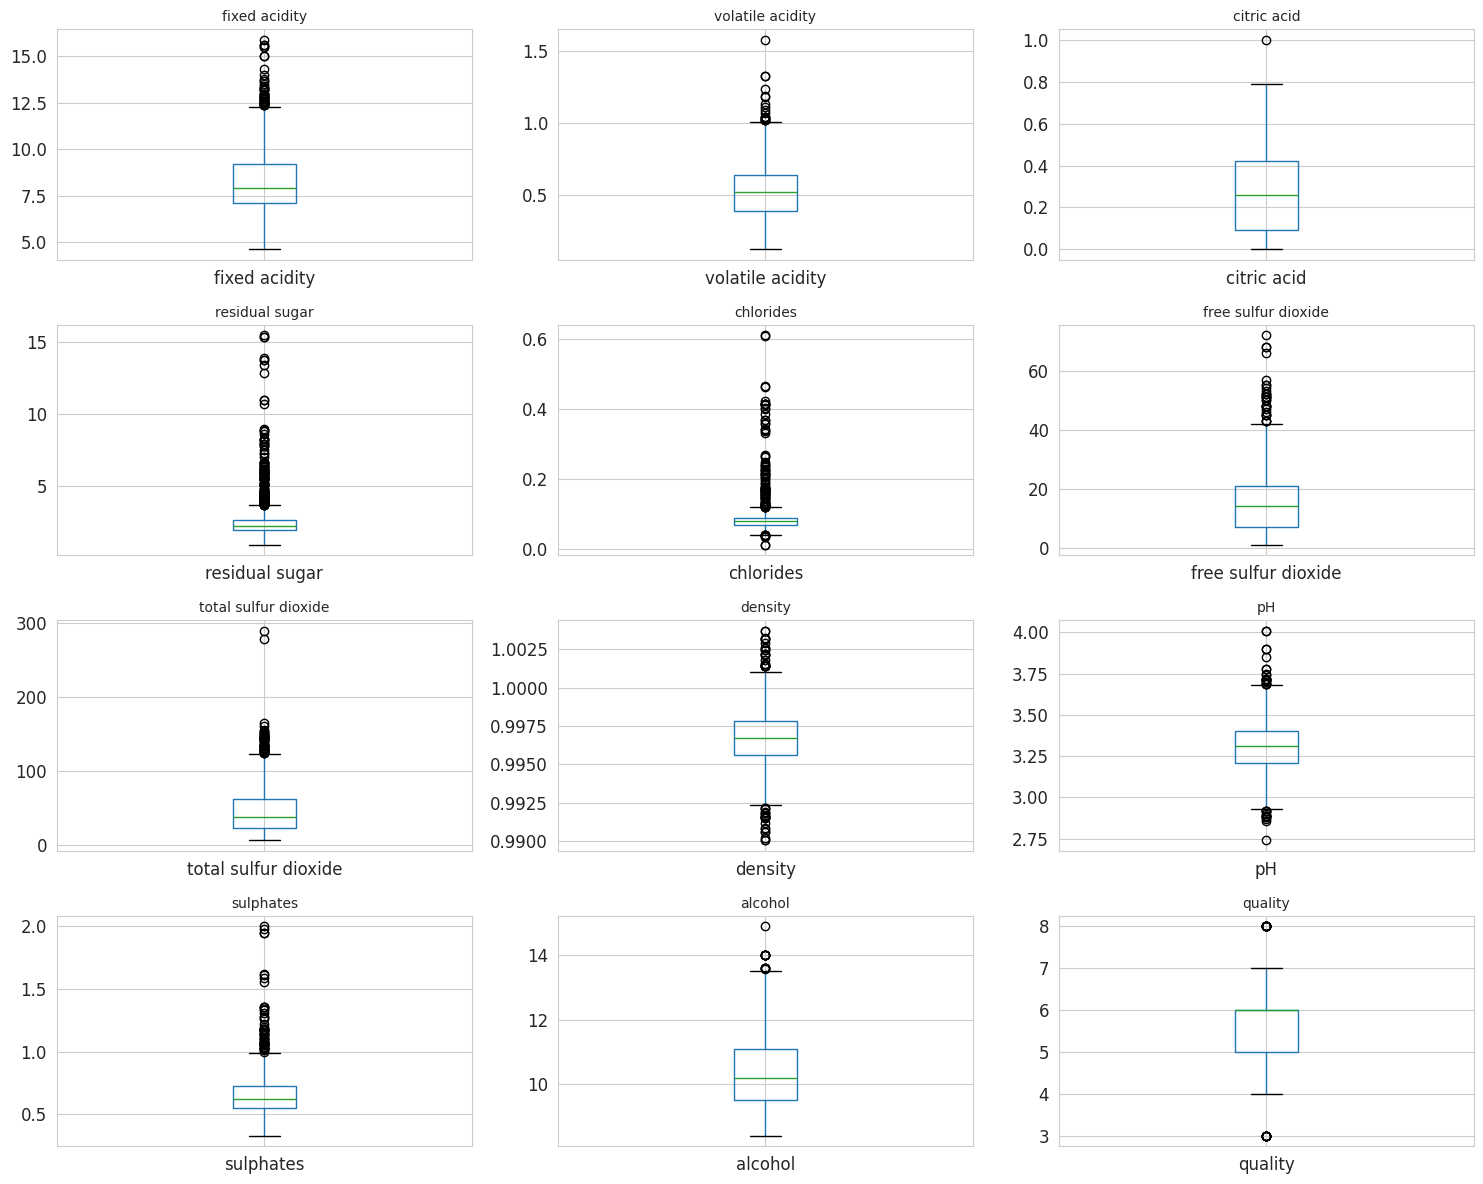

,Признак,Выбросы,%
0,fixed acidity,49,3.1%
1,volatile acidity,19,1.2%
2,citric acid,1,0.1%
3,residual sugar,155,9.7%
4,chlorides,112,7.0%
5,free sulfur dioxide,30,1.9%
6,total sulfur dioxide,55,3.4%
7,density,45,2.8%
8,pH,35,2.2%
9,sulphates,59,3.7%


Много выбросов (>5%): residual sugar, chlorides


In [ ]:
# Анализ выбросов
fig, axes = plt.subplots(4, 3, figsize=(15, 12))
axes = axes.ravel()
for i, column in enumerate(df.columns):
    df.boxplot(column=column, ax=axes[i])
    axes[i].set_title(column, fontsize=10)

plt.tight_layout()
plt.show()
# Количественный анализ выбросов
def count_outliers(column):
    Q1, Q3 = column.quantile(0.25), column.quantile(0.75)
    IQR = Q3 - Q1
    lower, upper = Q1 - 1.5*IQR, Q3 + 1.5*IQR
    return len(column[(column < lower) | (column > upper)])
outliers_data = [(col, count_outliers(df[col]), f"{(count_outliers(df[col])/len(df))*100:.1f}%")
                for col in df.columns]
outliers_df = pd.DataFrame(outliers_data, columns=['Признак', 'Выбросы', '%'])
display(outliers_df)
# Вывод
high_outliers = outliers_df[outliers_df['%'].str.replace('%','').astype(float) > 5]
if not high_outliers.empty:
    print("Много выбросов (>5%):", ", ".join(high_outliers['Признак'].tolist()))

Матрица корреляций:


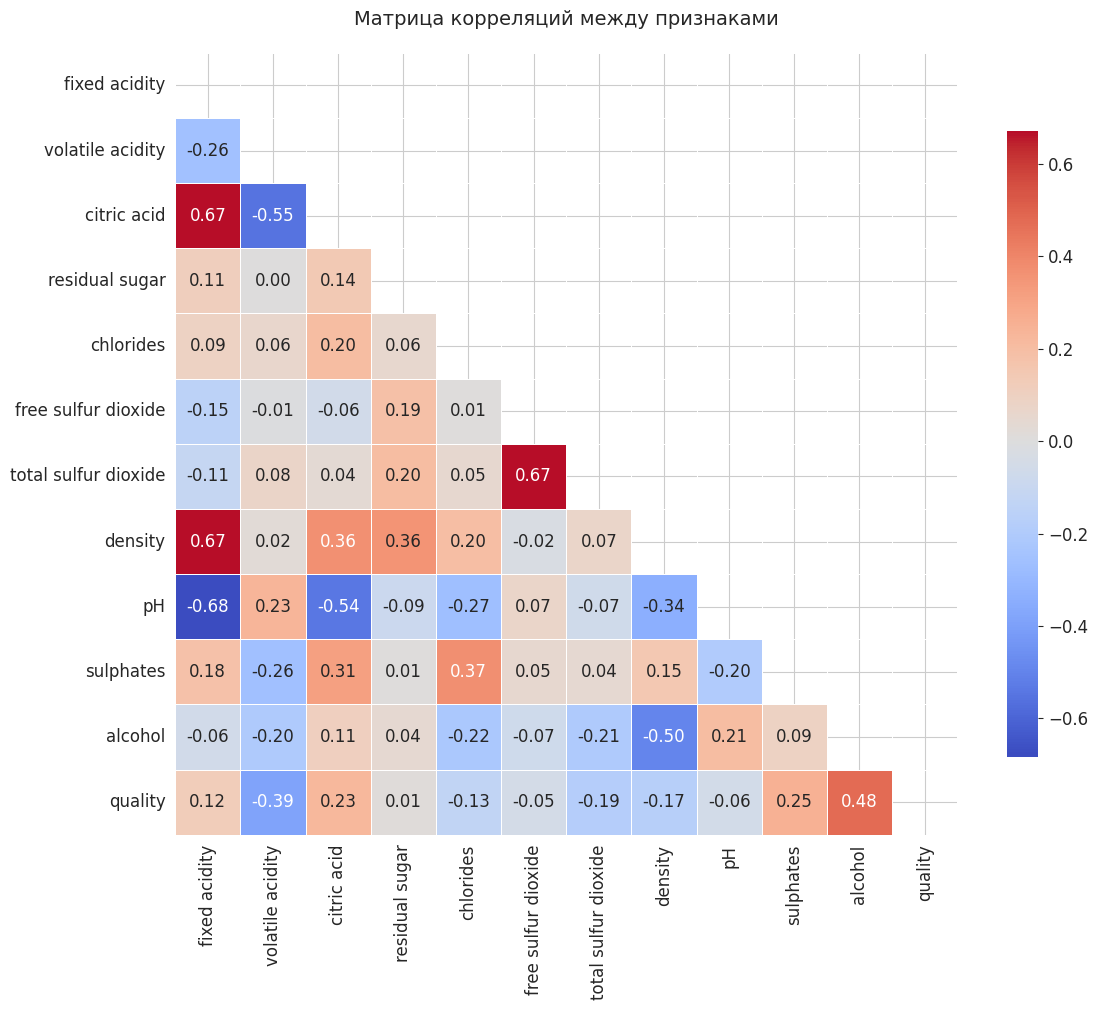

In [ ]:
print("Матрица корреляций:")
# Вычисляем матрицу корреляций
correlation_matrix = df.corr()
# Визуализируем тепловую карту
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5, fmt='.2f', cbar_kws={"shrink": .8})
plt.title('Матрица корреляций между признаками', fontsize=14, pad=20)
plt.tight_layout()
plt.show()

In [ ]:
# Анализ корреляций
corr_matrix = df.corr()
# Сильные корреляции (>0.5)
print("Сильные корреляции (|r|>0.5):")
strong_corr = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        corr_val = corr_matrix.iloc[i, j]
        if abs(corr_val) > 0.5:
            strong_corr.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_val))

for col1, col2, corr in sorted(strong_corr, key=lambda x: abs(x[2]), reverse=True):
    print(f"{col1} ↔ {col2}: {corr:.3f}")
# Корреляции с качеством
print("Корреляции с quality:")
quality_corr = corr_matrix['quality'].sort_values(ascending=False)
for feat, corr in quality_corr.items():
    if feat != 'quality' and abs(corr) > 0.1:
        print(f"{feat}: {corr:.3f}")

Сильные корреляции (|r|>0.5):
fixed acidity ↔ pH: -0.683
fixed acidity ↔ citric acid: 0.672
fixed acidity ↔ density: 0.668
free sulfur dioxide ↔ total sulfur dioxide: 0.668
volatile acidity ↔ citric acid: -0.552
citric acid ↔ pH: -0.542

Корреляции с quality:
alcohol: 0.476
sulphates: 0.251
citric acid: 0.226
fixed acidity: 0.124
chlorides: -0.129
density: -0.175
total sulfur dioxide: -0.185
volatile acidity: -0.391


МАТРИЦА ГРАФИКОВ РАССЕИВАНИЯ ДЛЯ КЛЮЧЕВЫХ ПРИЗНАКОВ:
Анализируемые признаки: ['alcohol', 'volatile acidity', 'sulphates', 'citric acid']


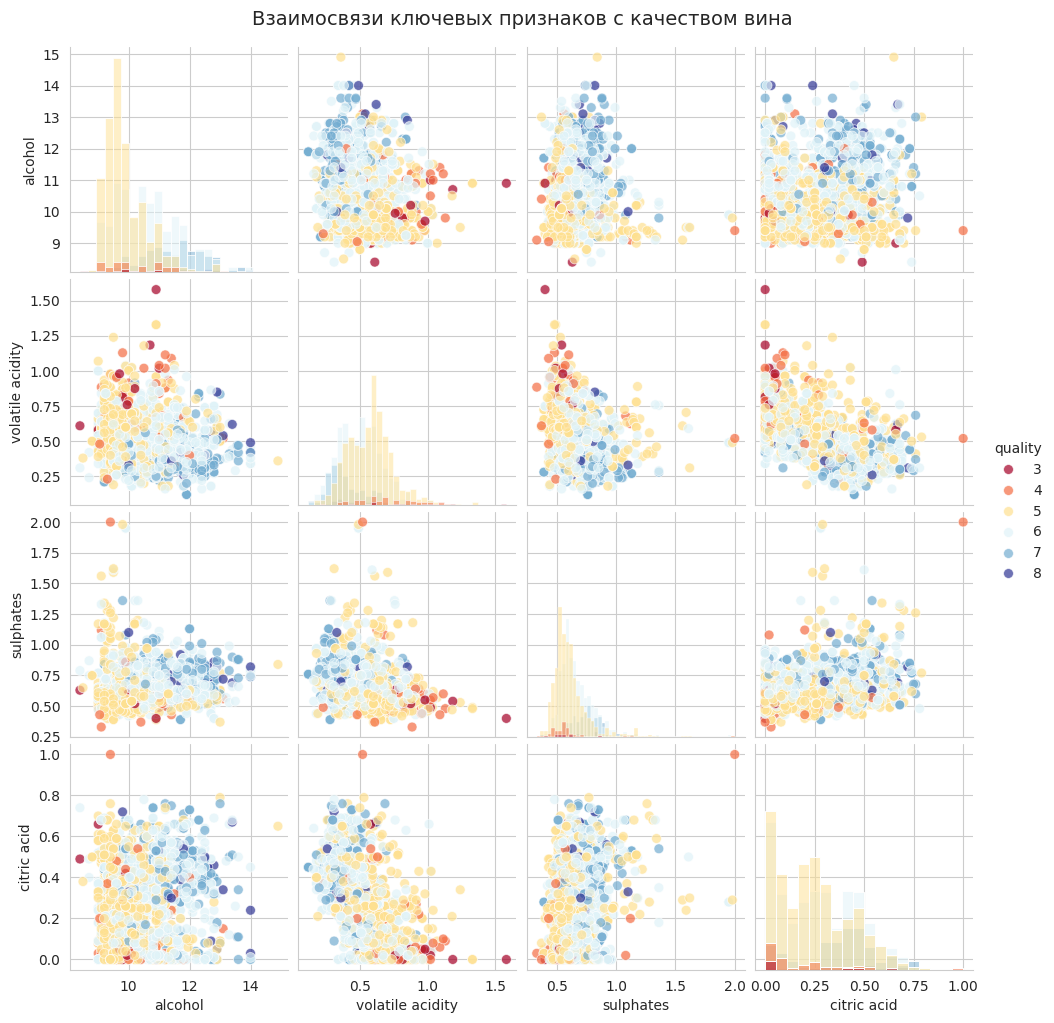

АНАЛИЗ ВЗАИМОСВЯЗЕЙ:
Alcohol <-> Quality: четкая положительная тенденция - чем выше алкоголь, тем лучше качество
Volatile acidity <-> Quality: явная отрицательная зависимость - высокая летучая кислотность ухудшает качество
Sulphates <-> Quality: слабая положительная корреляция
Citric acid <-> Quality: умеренная положительная связь
НАБЛЮДЕНИЯ:
Качество вина образует кластеры по уровням (5,6,7)
Высококачественные вина (7-8) концентрируются в области высокого alcohol и низкой volatile acidity
Некоторые пары признаков показывают нелинейные зависимости


In [9]:
# Матрица графиков рассеивания для ключевых признаков
print("МАТРИЦА ГРАФИКОВ РАССЕИВАНИЯ ДЛЯ КЛЮЧЕВЫХ ПРИЗНАКОВ:")

# Вычисляем матрицу корреляций
corr_matrix = df.corr()

# Выбираем 4 наиболее коррелированных с качеством признака
top_features = corr_matrix['quality'].abs().sort_values(ascending=False).index[1:5]
print(f"Анализируемые признаки: {list(top_features)}")

# Строим pairplot
analysis_features = list(top_features) + ['quality']
g = sns.pairplot(df[analysis_features], diag_kind='hist', hue='quality',
                 palette='RdYlBu', plot_kws={'alpha':0.7, 's':50})
plt.suptitle('Взаимосвязи ключевых признаков с качеством вина', y=1.02, fontsize=14)
plt.show()

print("АНАЛИЗ ВЗАИМОСВЯЗЕЙ:")
print("Alcohol <-> Quality: четкая положительная тенденция - чем выше алкоголь, тем лучше качество")
print("Volatile acidity <-> Quality: явная отрицательная зависимость - высокая летучая кислотность ухудшает качество")
print("Sulphates <-> Quality: слабая положительная корреляция")
print("Citric acid <-> Quality: умеренная положительная связь")
print("НАБЛЮДЕНИЯ:")
print("Качество вина образует кластеры по уровням (5,6,7)")
print("Высококачественные вина (7-8) концентрируются в области высокого alcohol и низкой volatile acidity")
print("Некоторые пары признаков показывают нелинейные зависимости")

In [ ]:
"""
ВЫВОД:

1. ДАТАСЕТ:
   Набор данных: Red Wine Quality (UCI)
   Предметная область: химические параметры красного вина
   Характер данных: реальные измерения

2. СТАТИСТИЧЕСКИЙ АНАЛИЗ:
   Пропущенные значения отсутствуют
   Выявлены выбросы в признаках: residual sugar, free sulfur dioxide
   Распределения близки к нормальным с правосторонней асимметрией

3. КОРРЕЛЯЦИОННЫЙ АНАЛИЗ:
   Сильные корреляции: density-fixed acidity, free-total sulfur dioxide
   Качество вина наиболее зависит от: alcohol (положительно), volatile acidity (отрицательно)
   Слабые корреляции: pH-citric acid, residual sugar-other features

4. ВЗАИМОСВЯЗИ ПРИЗНАКОВ:
   Alcohol положительно влияет на качество
   Volatile acidity отрицательно влияет на качество
   Sulphates и citric acid слабо положительно коррелируют с качеством

5. КЛАСТЕРИЗАЦИЯ ПО КАЧЕСТВУ:
   Вина естественно группируются по уровням качества (5,6,7)
   Высококачественные вина концентрируются в области высокого alcohol и низкой volatile acidity
"""